# Keras Time Series Anomaly Detection

# Introduction

In this notebook, a neural network is developed using Keras to detect anomalies in the Numenta Anomaly benchmark dataset. The code and plots have been adapted from the Keras documentation, which can be accessed via the below link.

https://keras.io/examples/timeseries/timeseries_anomaly_detection/.

### Overview of Machine Learning and Neural Networks

Machine learning is an area of computer science that allows computers to learn and act without being specifically programmed to do so. It entails building and adapting models that allow programmes to learn through experience. Algorithms are constructed to  adapt the models, which in turn gradually improves the predictions made by the programme.

The machine learning process begins with input data, such as examples, direct experience or instruction. The algorithm will look for patterns in the data so it can later make predictions based on the examples provided. There are several ways the algorithm can be trained to identify patterns in data, including the following:
- Supervised Learning: This is the most practical and widely used form of ML. It involves creating a function that relates input variables to labelled output values. The model is trained until it can detect the underlying patterns and relationships between the input and output data, meaning it can accurately predict output labels when presented with an entirely new dataset.In the real world, applications of supervised learning include risk assessment, image classification,fraud detection etc.
- Unsupervised Learning: In this form, algorithims are trained on unlabeled data, and scans through the data sets looking for any meaningful connections. Hence, in unsupervised learning the algorithm finds the patterns/similarities within the data instead of relating the data to an external measurement.
- Semi-supervised Learning: This is a combination of the two previous approaches. This is where unsupervised learning algorithms generate labels for input data, which are then fed into supervised learning algorithms. In this approach, some of the input data is labelled by humans, and some are guessed by unsupervised learning, and all these datapoints/labels are given to supervised learning algorithms to generate the AI model. 


### Keras Overview
Keras is an open-source Neural Network library written in Python, capable of running on TensorFlow, which is an end-to-end machine learning framework developed by Google. 

### The Numenta Anomaly Benchmark (NAB)

The ability to detect anomalies in data sets has numerous applications in fields such as fraud detection for credit cards, fault detection in safety critical systems and to detect network breaches in cybersecurity. Due to its wide range of potential uses, the problem of anomaly detection has been thoroughly researched, and several algorithms for this purpose have been proposed. However, there was no dataset or framework available for evaluating and benchmarking these algorithims; hence the Numenta Anomaly Benchmark was introduced in 2015. The NAB was developed by Numenta, which is a research company blending neuroscience and machine learning to drive advances in the field of Artificial intellegence.

The NAB is an open-source framework used to evaluate and compare anomaly detection algorithms. It includes a set of open-access, labelled data files and a common scoring system to compare the ability of different algorithms to detect anomalies in streaming data. Anomalies are patterns that do not match with previous patterns of behaviour for the relevant data stream. 

#### Data Files

In addition to simulated data files, the NAB also includes real-world data with outliers/anomalies that have known causes. These data files have been collected by Numenta over years of interacting with customers and resolving their anomaly-related issues. The NAB dataset includes a wide range of different metrics, such as IoT sensor output, social media activity, web server traffic and network utilization data. For these metrics, a range of anomaly types are included - for example, both planned system shutdowns and real failures, as different behaviour should be displayed for different types. The files also include some challenges in terms of anomaly detection, such as noise  In addition, data files without anomalies are included as a reference point. 

#### Anomaly Detection Scoring
An anomaly detection algorithm has two main functions: accepting data input such as that from the NAB files, and flagging anomalies within this data. According to Numenta, the perfect detector is one that:
- Works in real time
- Detects all anomalies in streaming data
- Is fully automated across all potential datasets
- Detects anomalies as soon as possible
- Does not supply any false positives.

The scoring mechanism proposed by the NAB, which aims to recognize algorithms with these traits, consists of three main components: 

1. Anomaly Windows
Anomaly windows are defined ranges of data points that surround a recorded anomaly, which represent the time immediately before/after the anomaly occurs. Points are awarded to algorithms that detect anomalies within this window, hence giving credit to algorithms capable of early detection. If an algorithm is detected outside the window, it is marked as a false positive and given a negative score.

2. Scoring Function
The scoring function is connected to the anomaly window; as mentioned above, positive scores are given for detections within the anomaly window and negative scores for detections outside the window.

3. Application Profiles
Application profiles acknowledge that the value/implications of false negatives and positives vary between industries and applications. For example, a false negative on a hospital EKG tracker may have much more serious effects on patient helat than a false positive. 

#### Source Data

The NAB source files are available on Kaggle at the below link:

[NAB Source Data](https://www.kaggle.com/datasets/boltzmannbrain/nab)

Below is the link to the Github repository for the project:

[GitHub Link](https://github.com/numenta/NAB)

As mentioned above, numerous real-world datasets are available, such as the following:
- AWS Server Metrics: Collected by AmazonCloudwatch Service. Metrics include CPU utilization, Network Bytes in and Disk Read bytes.
- Real Tweets: Collections of Twitter mentions of publicly traded companies, such as Google and IBM. 
- NYC Taxi Data: Number of of NYC taxi passengers, where anomalies include the NYC marathon, Thanksgiving, Christmas and a snow storm.

There are also two types of artificially-generated data:
- artificialNoAnomaly: Simulated data without anomalies
- artificalWithAnomaly: Simulated data with varying types of anomaly

This notebook uses one of the artificial data sets - daily_small_noise and daily_jump_up. Both files emulate the same data source, but while daily_small_noise does not contain any anomalies, these are present in daily_jump_up.

The code in this notebook demonstrates how a neural network, developed using Keras, can be trained to detect anomalies in the second file, by using the first file as a training data source.

# Loading the data

### Python Packages

In [1]:
# Numerical arrays.
import numpy as np

# Spreadsheet-like Data Frames.
import pandas as pd

# Neural networks.
import tensorflow.keras as keras

# Plotting
import matplotlib.pyplot as plt

### Data Sources

Both data sources are available on the NAB Github repository in CSV format. The below code gets the files in raw format that can be then fed into a Pandas dataframe - linking directly to Github will cause issues as HTML will be returned along with the CSV data.

In [2]:
# Root of URLs.
root_url = 'https://raw.githubusercontent.com/numenta/NAB/master/data/'

# Data file without anomaly.
no_anomaly_url = root_url + 'artificialNoAnomaly/art_daily_small_noise.csv'

# Data file with anomaly.
with_anomaly_url = root_url + 'artificialWithAnomaly/art_daily_jumpsup.csv'

### Pandas Dataframes

The below code reads the small_noise dataset and converts it to a Pandas dataframe. The parse_dates parameter allows the timestamp for the measurement to be interpreted as a datetime field, and the index_col paramaterconverts the timestamp column to the index column. 

In [3]:
# 
df_small_noise = pd.read_csv(no_anomaly_url, parse_dates=True, index_col="timestamp")

Below we can see that the data frame is generated as expected, with the timestamp used as an index column instead of the default column number.

In [4]:
# 
df_small_noise.head()

,value
timestamp,
2014-04-01 00:00:00,18.324919
2014-04-01 00:05:00,21.970327
2014-04-01 00:10:00,18.624806
2014-04-01 00:15:00,21.953684
2014-04-01 00:20:00,21.909120


Below descriptive statistics are generated for the dataset - in total there are 4032 values counted, which also can be checked by getting the shape of the dataframe. 

In [5]:
# 
df_small_noise.describe()

,value
count,4032.000000
mean,42.438353
std,28.077122
min,18.000964
25%,19.841390
50%,21.608487
75%,75.450282
max,87.976128


In [6]:
df_small_noise.shape

(4032, 1)

We can also repeat this for the daily_jump_up dataset to see if any significant differences between the two are apparent. 

In [7]:
df_daily_jumpsup = pd.read_csv(with_anomaly_url, parse_dates=True, index_col="timestamp")

In [8]:
df_daily_jumpsup.head()

,value
timestamp,
2014-04-01 00:00:00,19.761252
2014-04-01 00:05:00,20.500833
2014-04-01 00:10:00,19.961641
2014-04-01 00:15:00,21.490266
2014-04-01 00:20:00,20.187739


In [9]:
df_daily_jumpsup.describe()

,value
count,4032.000000
mean,44.494254
std,32.432473
min,18.001010
25%,19.991382
50%,21.648503
75%,76.435943
max,164.947481


In [10]:
df_daily_jumpsup.shape

(4032, 1)

Based on this initial analysis, we can see the following characteristics for the two datasets:
- The same number of observations/measurements exist for both datasets.
- The mean value is slightly higher in the daily_jump_up dataset
- The values for upper, median and lower quartiles are similar across the two datasets
- The max value in the jump_up dataset is twice that of the small_noise dataset - this is likely due to the recorded anomaly in the jump_up data. 

Below the data from the small_noise dataset is plotted. We can see that the data is relatively uniform, with peaks occurring betwwen 80 and 90 at approximately the same time intervals.

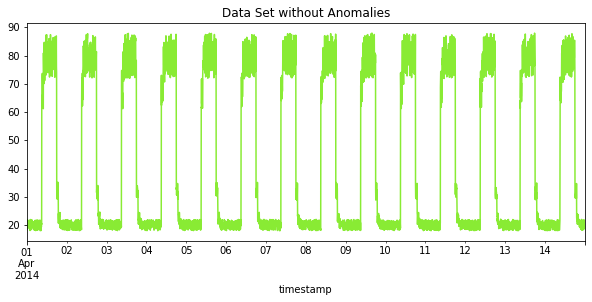

In [11]:
fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot data frame.
df_small_noise.plot(legend=False, ax=ax, color="#89eb34");
ax.set_title("Data Set without Anomalies");

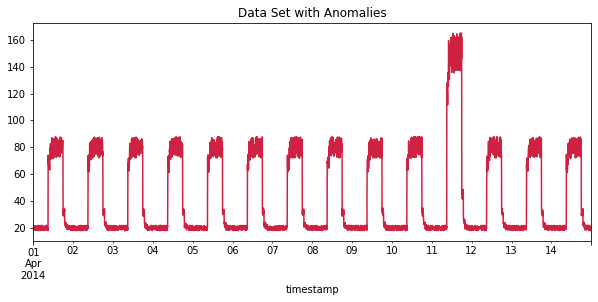

In [12]:
# 
fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot data frame.
df_daily_jumpsup.plot(legend=False, ax=ax, color = "#cf2141");
ax.set_title("Data Set with Anomalies");

We can see the data distribution is very similar to that of the first dataset, except for one measurement that reaches approximately 160.

## Preprocessing
***

### Data Normalization

Once both datasets have been converted to Pandas dataframes, the next step is to normalize the data.

Data is normalized by subtracting each value in the dataset from the mean, and dividing the result by the standard deviation. The main benefit of normalizing input data for neural networks is that it simplifies the traning process. For data that has not undergone this step, numerical ranges of different features may differ significantly. For example, a machine learning application that predicts house prices may consider different numerical factors, such as age of the house or square footage. In this scenario, the potential ranges for these two variables would be very different. House ages may be in the range of 0 to 25, while square footage may vary between 100 and 500 m<sup>2</sup>. If this data was given to the algorithm in its unnormalized form, the rate of convergence for the neural network will be adversely affected. Convergence is the stage at which no further improvements or changes to the model are expected. It is the point at which the learning rate decreases and the cost for the algorithm reaches its minimum value. If the input datasets are all on the same scale (normalized, generally between -1 and 1), the time taken to reach the point of convergence is signficantly reduced.

Below, the small noise data set is normalized, and the normalized data is added to a new column in the dataframe called df_train_vals.

First, the mean and standard deviation values are obtained.

In [13]:
# 
train_mean = df_small_noise.mean()

train_mean

value    42.438353
dtype: float64

In [14]:
# 
train_std = df_small_noise.std()

train_std

value    28.077122
dtype: float64

Next, the mean is subtracted from each datapoint, and the result divided by the standard deviation. This is saved to a new column, df_train_vals. These values will be used to train the anomaly detection algorithm.

In [15]:
df_train_vals = (df_small_noise - train_mean) / train_std

In [16]:
# Sanity check for training data
df_train_vals.head()

,value
timestamp,
2014-04-01 00:00:00,-0.858829
2014-04-01 00:05:00,-0.728993
2014-04-01 00:10:00,-0.848148
2014-04-01 00:15:00,-0.729586
2014-04-01 00:20:00,-0.731173


The below code divides the steps of the normalization process into thir own dataframe columns: less_mean and div_std. Then the mean and standard deviation values are compared for each preprocessing step: unprocessed data, subtracted mean, and divided by the standard deviation.

In [17]:
# For each value - subtract mean and add to new column. Then divide result by standard deviation and add to column
df_small_noise['less_mean'] = df_small_noise['value'] - df_small_noise['value'].mean()
df_small_noise['div_std'] = df_small_noise['less_mean'] / df_small_noise['value'].std()

In [18]:
#Sanity Check
df_small_noise

,value,less_mean,div_std
timestamp,,,
2014-04-01 00:00:00,18.324919,-24.113435,-0.858829
2014-04-01 00:05:00,21.970327,-20.468026,-0.728993
2014-04-01 00:10:00,18.624806,-23.813547,-0.848148
2014-04-01 00:15:00,21.953684,-20.484669,-0.729586
2014-04-01 00:20:00,21.909120,-20.529234,-0.731173
...,...,...,...
2014-04-14 23:35:00,20.211195,-22.227159,-0.791647
2014-04-14 23:40:00,20.531041,-21.907313,-0.780255
2014-04-14 23:45:00,19.032127,-23.406226,-0.833640


The dataframe sample printed above shows the majority of datapoints are between 18 and 20, becoming negative once the mean has been subtracted. When the result is divided by the standard deviation, the values range between 0.7 and 0.9. Therefore, the potential range of values is reduced significantly. 

Below, the mean and standard deviation values are compared at each preprocessing stage. The standard deviations are almost the same for steps one and two, but at step three (less_mean/standard deviation) the value is much lower, showing that the spread of values has been significantly reduced as a result of preprocessing.

In [19]:
df_small_noise['value'].mean(), df_small_noise['less_mean'].mean(), df_small_noise['div_std'].mean()

(42.438353335806646, -7.342627387941552e-14, -2.616541242931684e-15)

In [20]:
df_small_noise['value'].std(), df_small_noise['less_mean'].std(), df_small_noise['div_std'].std()

(28.077122281262515, 28.077122281262508, 1.0000000000000018)

Below the preprocessed data is plotted. Before normalization values for the dataset ranged between 20 and 90. Now the range is between -0.25 and 1.5, while the structure of the data has remained the same as the plot shows.

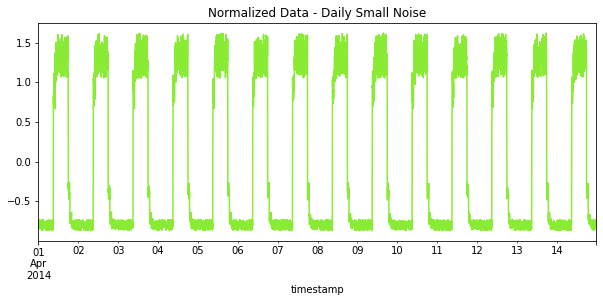

In [21]:
# 
fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot data frame.
df_train_vals.plot(legend=False, ax=ax, color="#89eb34");
ax.set_title("Normalized Data - Daily Small Noise");

### Time Steps/Windows

The next step is to divide the data set into windows or time steps. In neural networks, windows represent the number of units (seconds,minutes,hours,days etc) that are used to predict future steps. For example, if creating a neural network to predict hourly stock market changes, one hour could be considered a single timestep.

Our dataset can be divided into daily timesteps, each consisting of 288 recorded datapoints, as calculated below:

In [22]:
#Get total datapoints in one day by getting total minutes in 1 day and dividing by 5
# As we have one data point for every 5 minutes
mins_day = 24 * 60
samples_day = int(mins_day/5)
print("Total recorded values per day : {}".format(samples_day))

#14 days of data in df - need to multiply daily values by 14
print("Total recorded values: {}".format(samples_day * 14))

Total recorded values per day : 288
Total recorded values: 4032


As seen above, our dataset consists of one dimension/column with 4032 values, and the window size is 288. 

In [23]:
# Variable to hold window size, this will be required to iterate through training data
window_size = 288

### Window Example

The windows will be used to structure how data is passed to the neural network. In the case of this dataset, the datapoints will be passed in batches of 288, so the network will learn the typical pattern of recorded values for one 24-hour period. The entire dataset will be iterated through,with a new window created for each datapoint.

The below code illustrates how the windows concept works with a smaller array.

#### Step 1: Initialize Array and Define Windows

First, an array of size 14 is defined. The windows for this array will consist of three elements each.

In [24]:
# Window list example.
L = [1, 1, 2, 4, 5, 6, 7,4,5, 1, 2, 3, 4, 5]
# Example window size.
win_size = 3
# Length of L.
len(L)

14

#### Step 2: Create Windows

The next step is to iterate through the array L and create windows of 3: the current element in the loop should be the first element in the window, and the next two elements should be those to its right.

It will not be possible to create a new window for the last two elements, as they do not have two elements to their right. Therefore, we can calculate the number of windows required by subtracting 1 from the win_size variable and subtracting this from the length of our array.

In [25]:
# Number of windows from L.
len(L) - (win_size - 1)

12

In [26]:
# Remove brackets.
len(L) - win_size + 1

12

The below code generates and prints the windows. For each iteration, the current element along with the two values to its right are printed.

In [27]:
# Print the windows.
count = 0
for i in range(len(L) - win_size + 1):
    count += 1
    print(L[i:i + win_size])
print("Total Windows : {}".format(count))

[1, 1, 2]
[1, 2, 4]
[2, 4, 5]
[4, 5, 6]
[5, 6, 7]
[6, 7, 4]
[7, 4, 5]
[4, 5, 1]
[5, 1, 2]
[1, 2, 3]
[2, 3, 4]
[3, 4, 5]
Total Windows : 12


Note what happens when we attempt to print windows for each element in the array. Instead of 12 windows, 11 are returned: the window for the last full set of three (2,3,4) is printed and the last two elements are skipped.

In [28]:
count = 0
for i in range(len(L) - win_size):
    count += 1
    print(L[i:i + win_size])
print("Total Windows : {}".format(count))

[1, 1, 2]
[1, 2, 4]
[2, 4, 5]
[4, 5, 6]
[5, 6, 7]
[6, 7, 4]
[7, 4, 5]
[4, 5, 1]
[5, 1, 2]
[1, 2, 3]
[2, 3, 4]
Total Windows : 11


Next, the windows are appended to an empty array.

In [29]:
# For accumulating the windows.
wins = []

# Generate the windows
for i in range(len(L) - win_size):
    wins.append(L[i:i + win_size])

wins

[[1, 1, 2],
 [1, 2, 4],
 [2, 4, 5],
 [4, 5, 6],
 [5, 6, 7],
 [6, 7, 4],
 [7, 4, 5],
 [4, 5, 1],
 [5, 1, 2],
 [1, 2, 3],
 [2, 3, 4]]

#### Step 3 : Create 2D Array from windows

The next step is to create a 2D NumPy array from the windows array, as this format is required when passing input data to the Keras model creation functions later.

In [30]:
# Create a 2D numpy array from wins.
np.stack(wins)

array([[1, 1, 2],
       [1, 2, 4],
       [2, 4, 5],
       [4, 5, 6],
       [5, 6, 7],
       [6, 7, 4],
       [7, 4, 5],
       [4, 5, 1],
       [5, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

#### Step 4: Repeat to create windows for NAB Dataset

Below, the steps detailed in the previous sections are repeated to create windows from the NAB small_noise dataset.

The function takes two parameters, the array to be processed and the window size. It loops through each element in the array and creates a window, stopping at the last element from which a full window of 288 elements can be created. The resulting data is then converted to a 2-dimensional NumPy array.

In [31]:

def windows(vals, N=window_size):
  # Initialize array to hold values
  L = []
  # Loop through data
  for i in range(len(vals) - N + 1):
    # Create new window and add to array
    L.append(vals[i:i+N])
  # Stack
  return np.stack(L)

Below, the preprocessed data (subtracted mean,divided by standard deviation) is passed to the function. The output is a 2D array, consisting of 3745 windows of 288 data points each. The window count goes up to 3745 as this is the last element with 287 elements to its right.

In [32]:

x_train= windows(df_train_vals);
print("Total Windows : {}".format(x_train.shape[0]))
print("Elements per Window : {}".format(x_train.shape[1]))

#Subtract total windows from total values in data set, 
#expecting that last window is created for last element with 287 values after it, i.e. full window
print(4032-3745)

Total Windows : 3745
Elements per Window : 288
287


#### Step 5: Plot X Train Dataset

The final preprocessing step is to conduct some sanity checks on the x-train data and visualize the dataset with a plot.

##### Sanity Check

In [33]:
# Get the first and last datapoint in first and last windows
# Last : Window 3744, element at index 287

x_train[0][0], x_train[-1][-1]

(array([-0.85882857]), array([-0.8460886]))

In [34]:
# Get first and last element of original dataset, ensure they match
df_train_vals.iloc[0], df_train_vals.iloc[-1]

(value   -0.858829
 Name: 2014-04-01 00:00:00, dtype: float64,
 value   -0.846089
 Name: 2014-04-14 23:55:00, dtype: float64)

Based on the above, we can conclude all data points in the original training dataframe have been copied to the x_train array, as the first and last values in both are consistent.

##### Plot

Next, the full training dataset is plotted (values and cumulative counts).  

The first and last windows will be plotted in different colours to illustrate the distribution of values over a full day.

As mentioned above, a 2D Numpy array is required as input to the Keras modelling function. However, we require the windows to be one-dimensional for use in plotting. This can be achieved using the numpy flatten method. 

In [35]:
# 
x_train[0].flatten()

array([-0.85882857, -0.72899302, -0.84814772, -0.72958579, -0.731173  ,
       -0.75730984, -0.77645641, -0.7880838 , -0.747012  , -0.829166  ,
       -0.80377285, -0.7821597 , -0.81182078, -0.80949918, -0.82334701,
       -0.79001779, -0.74922405, -0.84169024, -0.73727717, -0.77223023,
       -0.75311352, -0.79116337, -0.75934728, -0.86809294, -0.75381057,
       -0.86468256, -0.74361965, -0.72908121, -0.82850668, -0.84043795,
       -0.76136364, -0.8343536 , -0.74708881, -0.85574949, -0.85245676,
       -0.73090636, -0.77440264, -0.74974936, -0.82419543, -0.77402585,
       -0.78574242, -0.7844733 , -0.77316412, -0.78843253, -0.80927467,
       -0.83109167, -0.76090519, -0.83816509, -0.77176485, -0.83715923,
       -0.78131343, -0.76396862, -0.83924191, -0.86186112, -0.85174179,
       -0.78406773, -0.74938477, -0.86399047, -0.76581026, -0.82177506,
       -0.80222751, -0.73807119, -0.82310669, -0.80410682, -0.86845167,
       -0.85877599, -0.83356075, -0.86643297, -0.78045221, -0.80

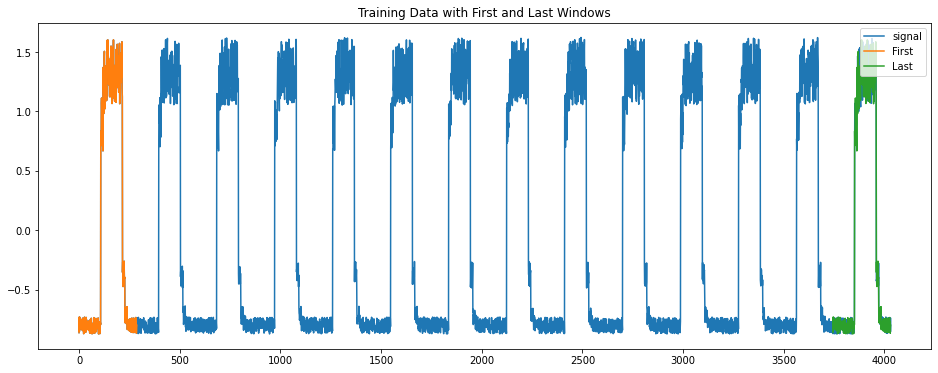

In [36]:
# Index for first and last window starting points
first_window = 0
last_window = 3744

# Generate Plot
fig, ax = plt.subplots(figsize=(16, 6))

# Y axis - processed values in data frame
y = df_train_vals['value'].values

# Plot data - x axis represents cumulative value counts - 0 - 4032
ax.plot(np.arange(y.shape[0]), y, label='signal')

# Get elems for first and last window, flatten them so they can be plotted
w = x_train[first_window].flatten()
w2 = x_train[last_window].flatten()

# Plot first and last windows
# Starting point on x axis - first element in window 
# Length - 288
ax.plot(np.arange(w.shape[0]) + first_window, w, label='First')
ax.plot(np.arange(w2.shape[0]) + last_window, w, label='Last')

ax.legend(loc = "upper right");

ax.set_title("Training Data with First and Last Windows");

## Neural Network

***

#### Type of Neural Network : Convolutional Reconstruction Autoencoder

The model created to reconstruct our data set is a convolutional reconstruction autoencoder.
This means that the neural network contains specialized layers called convolutional layers, which are intended to identify patterns in data. They receive input, transform it and output the transformed data to the next layer.


A Reconstruction Autoencoder model is trained to copy its input to its output. A frequent use case for this type of model is image reconstruction; for example, given an image of a handwritten digit, the autoencoder converts the image to a lower-level compressed representation, then decodes this representation back to an image, while minimizing reconstruction error. In our case, the autoencoder model is being trained to recognize and recreate daily patterns in our dataset.

##### Keras Keywords for  Layer Creation

- **Input**: This is the input layer, which takes input of shape (batch_size, sequence_length, features).The sequence_length is set to 288, which is our total number of samples per day, and features is set to 1, as we only are dealing with one data point. The output of the model should have the same shape as the input.


- **Convolutional Layers**: As mentioned above, the convolutional layers apply a convolutional operation to the input data,and the result is supplied as input to the next layer.
    - **Filter and Kernel Size**: The input data is transformed by filters, which act like sliding windows over the data set; each window works independently on the data set. Kernel size corresponds to the size of the window; therefore, our first layer consists of 32 filters of size 7, and the second layer consists of 16. 
    - **Padding**: The padding parameter is set to "same" in our model, meaning that the output will be padded with 0s to ensure it has the same size as the input.
    - **Strides**: The stride is the step size as the filter moves across the dataset, i.e. two elements to the right in this case.
    - **Activation** : The activation function in a neural network is responsible for transforming the input data for each node in the network to the output for that node. In the below case, the relu, or Rectified Linear Activation function is used. This is the default activation function for many types of neural network as it is relatively easy to train and often achieves better performance than other functions. The function will directly output the input value if the input is positive, otherwise it will output 0.
    
    
- **Dropout**: The dropout function in Keras randomly sets input units to 0, in in this case with a frequency rate of 0.2 per step during the training process. This helps to prevent overfitting, which is when the model memorizes the noise and fits too closely to the training data set, which will affect its ability to adapt to new input data.

In [87]:
# Create Model to identify patterns in/recreate dataset
layers = [
  #Input - generate input tensor with sequence size 288, and number features 1
    keras.layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
  #Create first convolutional layer to act on input data
  keras.layers.Conv1D(
    filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
  #Dropout - add 0s into data to prevent overfitting
  keras.layers.Dropout(rate=0.2),
  #Create second convolutional layer
  keras.layers.Conv1D(
    filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
  #The transpose function inverts the output of the convolution layers and 
  #reconstructs the original input
  #Autoencoder models - learn output and decode into the original input values
  keras.layers.Conv1DTranspose(
    filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
  keras.layers.Dropout(rate=0.2),
  keras.layers.Conv1DTranspose(
    filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
  keras.layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
]

#### Optimization and Compilation of Model

When the layers have been defined, we can create the model, passing the array of layers as an argument to the initialization function.

Below, a sequential model is initiated. This is one of the more basic model types offered by Keras, consisting simply of a sequence of layers,one after the other. 

In [81]:
# Create model
model = keras.Sequential(layers)

Next, an optimizer is defined. These are used to change aspects of the model such as weights and learning rates in order to minimize its cost function. 

One type of algorithm used for this purpose is called Gradient Descent. The term gradient descent refers to the changes to the model that move it along a slope or gradient in a graph toward the lowest possible error value. Each time the algorithm is run, it moves stepwise towards in the direction of the steepest descent (negative). The size of each step is called the learning rate. Larger steps allow for a higher learning rate, but may be less precise, while smaller steps allow for greater precision but are more time-consuming to run on larger datasets. 

The Adaptive Movement Estimation (Adam) algorithm, which is the optimizer used for this model, is an extension to Gradient Descent. One limitation of traditional Gradient Descent algorithms is that a single learning rate is used for all input values. Adam automatically adapts the learning rate for each input variable by tracking the exponential moving averages of the gradient (first moment) and the square of the gradients (second moment). Consequently, the Adam algorithm generally achieves better results than other optimization algorithms, have faster processing times and require less parameters for fine tuning. Therefore, Adam is recommended as the default optimiser for most applications.

In [ ]:
# Create Optimizer
# Learning rate is kept at default value - small steps
optimizer = keras.optimizers.Adam(learning_rate=0.001)

Next, the model is compiled. During compilation, the model is checked for errors, and the optimizer and loss functions are defined. Loss functions are special types of function that help minimize the error and reach as close as possible to the expected output. The loss function used for this model is Mean Standard Error (MSE). This function assesses the average squared difference between the observed (actual) values and those predicted by the model. When a model has no error, the MSE equals 0, and the MSE value increases as the error does. 

In [ ]:
# Compile model
model.compile(optimizer=optimizer, loss="mse")

Below a summary of the compiled model is printed.

The summary can be interpreted as follows:
- **Output Shape**: Shape of output for each layer, the structure is the same as input (batch size, sequence length,features). The features corresponds to the filter number set for the layer. Note that for the conv1d layer the sequence length corresponds to half the total number of samples per day, as the stride length was set to 2. We can see that the final output has the same shape as the input layer, meaning the model should be reconstructing the original input data.
- **Param #**: Total parameters trained for each layer. The total parameters are obtained by multiplying the filter value by the kernel size and adding the bias (total filters in layer), e.g. 32*7+32 = 256
- **Trainable/Non-Trainable Parameters**: Trainable parameters have their values adjusted/modified during training in accordance to their gradient, while non-trainable parameters are those that are kept constant and not adjusted during training. Two potential types of non-trainable parameter include:
    - Parameters we choose to keep constant during training, by setting the trainable boolean for the layer to false.
    - The Batch Normalization layer, which is used to normalize input data, has built-in non-trainable weights. These are used to keep track of the mean and variance of input data during training.
    - In our model, all parameters are trainable.

In [88]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_20 (Conv1D)           (None, 144, 32)           256       
_________________________________________________________________
dropout_20 (Dropout)         (None, 144, 32)           0         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 72, 16)            3600      
_________________________________________________________________
conv1d_transpose_30 (Conv1DT (None, 144, 16)           1808      
_________________________________________________________________
dropout_21 (Dropout)         (None, 144, 16)           0         
_________________________________________________________________
conv1d_transpose_31 (Conv1DT (None, 288, 32)           3616      
_________________________________________________________________
conv1d_transpose_32 (Conv1DT (None, 288, 1)           

#### Fitting the Model

This step trains the model by slicing the input data into batches of a defined size, and repeatedly iterating over the dataset for a given number of epochs (iterations). 

The below code applies the fit function to our newly created model. Note that the x_train data is used for both training and target output, as we are trying to train the model to recognize and recreate the patterns in the small_noise data set. 

The funtion will iterate over the dataset 50 times, and the given batch size is 128. 

A validation split of 0.1 is specified; this means that 90% of the data will be used for training and 10% will be used for validation. This is required because using the training data to evaluate the performance of the model would result in a biased score. Instead, a portion of the data is isolated from the training set and used solely to evaluate the model, resulting in an unbiased assessment of performance. This is often called a train-test split approach to model evaluation.

##### Callbacks - EarlyStopping
Callbacks in Keras provide a way to execute code and interact with the training process automatically. The type of callback used for this model is EarlyStopping, which allows you to specify the performance monitor to trigger, and once triggered, this will stop the training process. In the below code, the callbacks are set to monitor validation loss, which evaluates performance of the model on the validation data set. The mode is set to min, which means the epoch will terminate when the minimum loss value is found. Patience refers to the number of epochs with no improvement before which training will be stopped. For this model, it has been set to 5, meaning training will stop after 5 iterations with no improvement to the validation loss. 

In [67]:
# 
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/50
27/27 [==============================] - 2s 93ms/step - loss: 0.6854 - val_loss: 0.3863
Epoch 2/50
27/27 [==============================] - 3s 93ms/step - loss: 0.1349 - val_loss: 0.0531
Epoch 3/50
27/27 [==============================] - 2s 84ms/step - loss: 0.0601 - val_loss: 0.0399
Epoch 4/50
27/27 [==============================] - 2s 89ms/step - loss: 0.0512 - val_loss: 0.0349
Epoch 5/50
27/27 [==============================] - 3s 98ms/step - loss: 0.0441 - val_loss: 0.0304
Epoch 6/50
27/27 [==============================] - 2s 87ms/step - loss: 0.0380 - val_loss: 0.0281
Epoch 7/50
27/27 [==============================] - 3s 94ms/step - loss: 0.0337 - val_loss: 0.0279
Epoch 8/50
27/27 [==============================] - 2s 83ms/step - loss: 0.0309 - val_loss: 0.0273
Epoch 9/50
27/27 [==============================] - 2s 85ms/step - loss: 0.0288 - val_loss: 0.0277
Epoch 10/50
27/27 [==============================] - 2s 88ms/step - loss: 0.0270 - val_loss: 0.0277
Epoch 11/

Above, the results of the epochs are printed. The loss value refers to the performance of the model on the training set, and as mentioned above the val_loss metric indicates its performance on the validation set. 

## Evaluation

***

The Keras history object can be used to assess the results of the training step. History is another form of Keras callback that is automatically applied to each epoch, and

In [89]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


In [43]:
history.history["loss"]

[0.5690252780914307,
 0.22238513827323914,
 0.06413883715867996,
 0.04646361991763115,
 0.039200957864522934,
 0.03452721983194351,
 0.03126921504735947,
 0.028743121773004532,
 0.02690424956381321,
 0.0253772996366024,
 0.02394309639930725,
 0.022810552269220352,
 0.021893588826060295,
 0.020974792540073395,
 0.020253365859389305,
 0.01959056966006756,
 0.018887996673583984,
 0.018239367753267288,
 0.017592644318938255,
 0.016952136531472206,
 0.01640777848660946,
 0.01579337939620018,
 0.015196586959064007,
 0.014652401208877563,
 0.014153114520013332,
 0.013555461540818214,
 0.01301147323101759,
 0.012477628886699677,
 0.01198225375264883,
 0.011503142304718494,
 0.011063246056437492,
 0.01057976670563221,
 0.01020937692373991,
 0.009826011955738068,
 0.009492211975157261,
 0.009082047268748283,
 0.008782835677266121,
 0.008505412377417088,
 0.008193534798920155,
 0.007992717437446117,
 0.007747524417936802,
 0.0075449263677001,
 0.007346887141466141,
 0.007193868514150381,
 0.00696

In [44]:
history.history["val_loss"]

[0.37448015809059143,
 0.07200631499290466,
 0.035048771649599075,
 0.032255351543426514,
 0.026860620826482773,
 0.026218093931674957,
 0.026498688384890556,
 0.026121092960238457,
 0.026698177680373192,
 0.02611420676112175,
 0.027828466147184372,
 0.026442144066095352,
 0.02485203742980957,
 0.02516832761466503,
 0.02243974059820175,
 0.025979749858379364,
 0.02322378009557724,
 0.022365504875779152,
 0.020145442336797714,
 0.018897246569395065,
 0.018620841205120087,
 0.0203412938863039,
 0.017257235944271088,
 0.01709476113319397,
 0.014871635474264622,
 0.014980082400143147,
 0.013663490302860737,
 0.013079782947897911,
 0.012459841556847095,
 0.01140872947871685,
 0.011026943102478981,
 0.01094808243215084,
 0.010264880023896694,
 0.009411320090293884,
 0.009250464849174023,
 0.008155275136232376,
 0.008416611701250076,
 0.008492888882756233,
 0.008000088855624199,
 0.007082298398017883,
 0.0074034822173416615,
 0.006723578087985516,
 0.006131111178547144,
 0.006493955384939909,

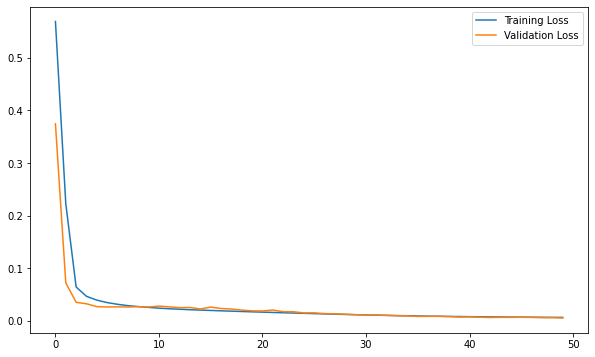

In [45]:
# 
fig, ax = plt.subplots(figsize=(10, 6))
# 
ax.plot(history.history["loss"], label="Training Loss")
# 
ax.plot(history.history["val_loss"], label="Validation Loss")
# 
ax.legend();

In [46]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)

In [47]:
# Calculate loss...
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

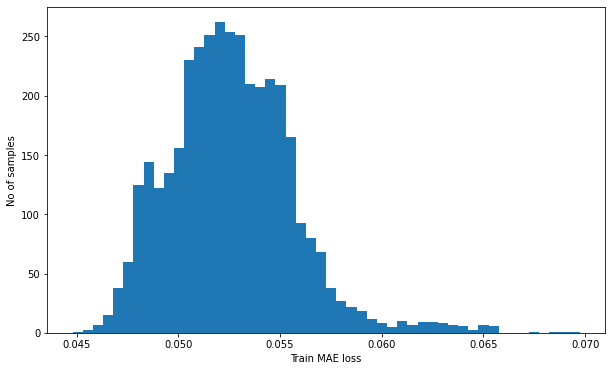

In [48]:
# 
fig, ax = plt.subplots(figsize=(10, 6))
# 
ax.hist(train_mae_loss, bins=50)
# 
ax.set_xlabel("Train MAE loss")
#
ax.set_ylabel("No of samples");

In [49]:
# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)

# 
threshold

0.06973677580461893

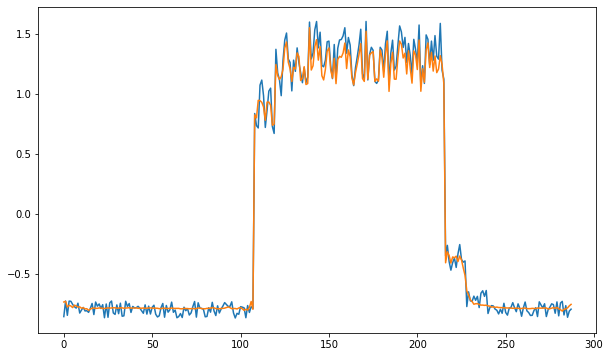

In [50]:
# 
fig, ax = plt.subplots(figsize=(10, 6))

# 
ax.plot(x_train[0])

# 
ax.plot(x_train_pred[0]);

In [51]:
# 
df_test_value = (df_daily_jumpsup - train_mean) / train_std

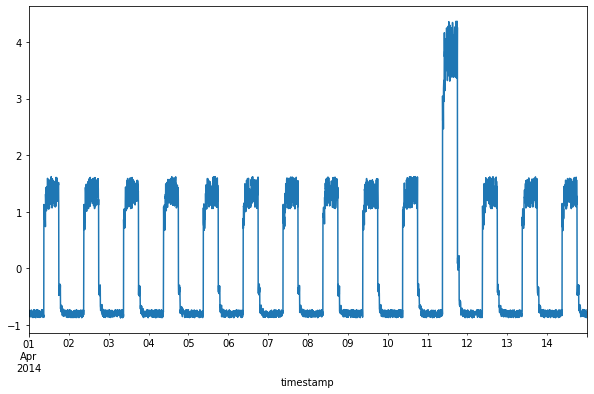

In [52]:
# 
fig, ax = plt.subplots(figsize=(10, 6))

# 
df_test_value.plot(legend=False, ax=ax);

In [53]:
# Create sequences from test values.
x_test = windows(df_test_value.values)

x_test.shape

(3745, 288, 1)

In [54]:
# 
x_test_pred = model.predict(x_test)

In [55]:
# 
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)

test_mae_loss

array([[0.05187975],
       [0.05349547],
       [0.05402346],
       ...,
       [0.0518701 ],
       [0.05508626],
       [0.05363255]])

In [56]:
# 
test_mae_loss = test_mae_loss.reshape((-1))

test_mae_loss

array([0.05187975, 0.05349547, 0.05402346, ..., 0.0518701 , 0.05508626,
       0.05363255])

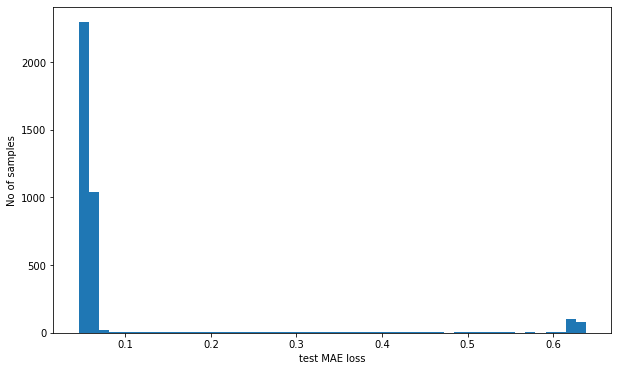

In [57]:
# 
fig, ax = plt.subplots(figsize=(10, 6))

#
ax.hist(test_mae_loss, bins=50)

# 
ax.set_xlabel("test MAE loss")

# 
ax.set_ylabel("No of samples");

In [58]:
# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold

# NUmber of anomalies.
np.sum(anomalies)

407

In [59]:
# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
inds = []

for i in range(window_size - 1, len(df_test_value) - window_size + 1):
    if np.all(anomalies[i - window_size + 1 : i]):
        inds.append(i)

In [60]:
# 
df_subset = df_daily_jumpsup.iloc[inds]

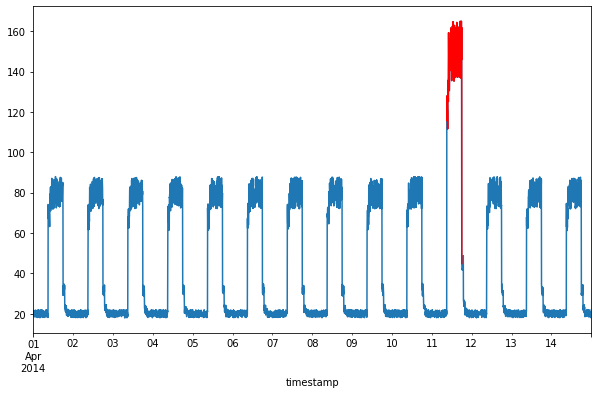

In [61]:
#
fig, ax = plt.subplots(figsize=(10, 6))

# 
df_daily_jumpsup.plot(legend=False, ax=ax)

# 
df_subset.plot(legend=False, ax=ax, color="r");

***

## End